# Course Project

We'll use the setup from the `homework_2_A_setup.ipynb` notebook for this exercise as well. If you think that you broke that setup in the previous exercise, just rerun the setup cell in `homework_2_A_exercise_1.ipynb` before continuing.

## Albedo Changes

### Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # if you want to do some plotting using matplotlib (optional)
import numpy as np # provide some mathematical functions
import xarray as xr # read, write, manipulate and analyze NetCDF files
from pathlib import Path # modify paths to files on the system
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
import warnings
warnings.filterwarnings('ignore')
import pysumma as ps

In [2]:
executable = 'summa.exe'
filemanager = '/home/jovyan/data/umpqua/settings/snow_fileManager_umpqua.txt'

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Modify the albedo formulation

In this exercise we will modify the albedo formulation and the parameters that govern that formulation. For background to this exercise see Clark et al. (2015). You should examine the following three scenarios:

* Use a variable decay rate for the snow albedo. Note that this is the same as the default case used in the Homework 2 Exercise 1, so you actually already have these results. In this case the `alb_method` decision is set to `varDecay`.

* Use a constant decay rate for the snow albedo (but use the same parameters as for the variable decay rate). In this case, set `alb_method` to `conDecay` in the decisions..

* Use a constant decay rate for the snow albedo and use appropriate parameters. So set `alb_method` to `conDecay` and set the following parameters in the local parameter file. Try setting `albedoDecayRate` to 360000.0

In [4]:

s = ps.Simulation(executable, filemanager)
# set unburned albedo values
print('old: ' + str(s.global_hru_params['albedoMax']))
s.global_hru_params['albedoMax'] = 0.8
print('new: ' + str(s.global_hru_params['albedoMax']))

print('old: ' + str(s.global_hru_params['albedoMinWinter']))
s.global_hru_params['albedoMinWinter'] = 0.6
print('new: ' + str(s.global_hru_params['albedoMinWinter']))

print('old: ' + str(s.global_hru_params['albedoMinSpring']))
s.global_hru_params['albedoMinSpring'] = 0.45
print('new: ' + str(s.global_hru_params['albedoMinSpring']))

print('old: ' + str(s.global_hru_params['albedoDecayRate']))
s.global_hru_params['albedoDecayRate'] = 6171428
print('new: ' + str(s.global_hru_params['albedoDecayRate']))

print('old: ' + str(s.global_hru_params['albedoRefresh']))
s.global_hru_params['albedoRefresh'] = 1.5
print('new: ' + str(s.global_hru_params['albedoRefresh']))
# Add in some additional variables so we can demonstrate plotting capabilities
output_settings = {'period': 1, 'instant': 1, 'sum': 0, 
              'mean': 0, 'variance': 0, 'min': 0, 'max': 0}
layer_vars = ['mLayerTemp', 'mLayerDepth', 'mLayerHeight',
              'iLayerHeight', 'scalarSnowDepth', 'nSnow', 'scalarGroundNetNrgFlux']

# Create the new variables
for var in layer_vars:
    s.output_control[var] = output_settings

# Ensure all variables have the same statistics
all_vars = set(layer_vars + [o.name for o in s.output_control.options])
for var in all_vars:
    s.output_control[var] = output_settings

old: albedoMax                 |       0.8400 |       0.7000 |       0.9500
new: albedoMax                 |       0.8000 |       0.8000 |       0.8000
old: albedoMinWinter           |       0.5500 |       0.6000 |       1.0000
new: albedoMinWinter           |       0.6000 |       0.6000 |       0.6000
old: albedoMinSpring           |       0.5500 |       0.3000 |       1.0000
new: albedoMinSpring           |       0.4500 |       0.4500 |       0.4500
old: albedoDecayRate           |       1.0d+6 |       1.0d+5 |       5.0d+6
new: albedoDecayRate           |       6.2d+6 |       6.2d+6 |       6.2d+6
old: albedoRefresh             |       1.0000 |       1.0000 |      10.0000
new: albedoRefresh             |       1.5000 |       1.5000 |       1.5000


In [5]:
s.run('local', run_suffix='_nofire')

In [6]:
s.status

'Success'

In [7]:
s_cst = ps.Simulation(executable, filemanager)
# Shorten the simulation length
s_cst.decisions['alb_method'] = 'conDecay'

print('old: ' + str(s_cst.global_hru_params['albedoMax']))
s_cst.global_hru_params['albedoMax'] = 0.8
print('new: ' + str(s_cst.global_hru_params['albedoMax']))

print('old: ' + str(s_cst.global_hru_params['albedoMinWinter']))
s_cst.global_hru_params['albedoMinWinter'] = 0.6
print('new: ' + str(s_cst.global_hru_params['albedoMinWinter']))

print('old: ' + str(s_cst.global_hru_params['albedoMinSpring']))
s_cst.global_hru_params['albedoMinSpring'] = 0.6
print('new: ' + str(s_cst.global_hru_params['albedoMinSpring']))

print('old: ' + str(s_cst.global_hru_params['albedoRefresh']))
s_cst.global_hru_params['albedoRefresh'] = 1.5
print('new: ' + str(s_cst.global_hru_params['albedoRefresh']))
# Add in some additional variables so we can demonstrate plotting capabilities
output_settings = {'period': 1, 'instant': 1, 'sum': 0, 
              'mean': 0, 'variance': 0, 'min': 0, 'max': 0}
layer_vars = ['mLayerTemp', 'mLayerDepth', 'mLayerHeight',
              'iLayerHeight', 'scalarSnowDepth', 'nSnow', 'scalarGroundNetNrgFlux']

# Create the new variables
for var in layer_vars:
    s_cst.output_control[var] = output_settings

# Ensure all variables have the same statistics
all_vars = set(layer_vars + [o.name for o in s_cst.output_control.options])
for var in all_vars:
    s_cst.output_control[var] = output_settings

old: albedoMax                 |       0.8400 |       0.7000 |       0.9500
new: albedoMax                 |       0.8000 |       0.8000 |       0.8000
old: albedoMinWinter           |       0.5500 |       0.6000 |       1.0000
new: albedoMinWinter           |       0.6000 |       0.6000 |       0.6000
old: albedoMinSpring           |       0.5500 |       0.3000 |       1.0000
new: albedoMinSpring           |       0.6000 |       0.6000 |       0.6000
old: albedoRefresh             |       1.0000 |       1.0000 |      10.0000
new: albedoRefresh             |       1.5000 |       1.5000 |       1.5000


In [8]:
s_cst.run('local', run_suffix='constant_decay')

In [9]:
s_cst.status

'Success'

In [10]:
s_fire = ps.Simulation(executable, filemanager)
# Shorten the simulation length
s_fire.decisions['alb_method'] = 'conDecay'

# set albedo values
print('old: ' + str(s_fire.global_hru_params['albedoMax']))
s_fire.global_hru_params['albedoMax'] = 0.58
print('new: ' + str(s_fire.global_hru_params['albedoMax']))

print('old: ' + str(s_fire.global_hru_params['albedoMinWinter']))
s_fire.global_hru_params['albedoMinWinter'] = 0.3
print('new: ' + str(s_fire.global_hru_params['albedoMinWinter']))

print('old: ' + str(s_fire.global_hru_params['albedoMinSpring']))
s_fire.global_hru_params['albedoMinSpring'] = 0.3
print('new: ' + str(s_fire.global_hru_params['albedoMinSpring']))

print('old: ' + str(s_fire.global_hru_params['albedoDecayRate']))
s_fire.global_hru_params['albedoDecayRate'] = 3085714.29 # units of days  
print('new: ' + str(s_fire.global_hru_params['albedoDecayRate']))

print('old: ' + str(s_fire.global_hru_params['albedoRefresh']))
s_fire.global_hru_params['albedoRefresh'] = 1.5
print('new: ' + str(s_fire.global_hru_params['albedoRefresh']))
# Add in some additional variables so we can demonstrate plotting capabilities
output_settings = {'period': 1, 'instant': 1, 'sum': 0, 
              'mean': 0, 'variance': 0, 'min': 0, 'max': 0}
layer_vars = ['mLayerTemp', 'mLayerDepth', 'mLayerHeight',
              'iLayerHeight', 'scalarSnowDepth', 'nSnow', 'scalarGroundNetNrgFlux']

# Create the new variables
for var in layer_vars:
    s_fire.output_control[var] = output_settings

# Ensure all variables have the same statistics
all_vars = set(layer_vars + [o.name for o in s_fire.output_control.options])
for var in all_vars:
    s_fire.output_control[var] = output_settings

old: albedoMax                 |       0.8400 |       0.7000 |       0.9500
new: albedoMax                 |       0.5800 |       0.5800 |       0.5800
old: albedoMinWinter           |       0.5500 |       0.6000 |       1.0000
new: albedoMinWinter           |       0.3000 |       0.3000 |       0.3000
old: albedoMinSpring           |       0.5500 |       0.3000 |       1.0000
new: albedoMinSpring           |       0.3000 |       0.3000 |       0.3000
old: albedoDecayRate           |       1.0d+6 |       1.0d+5 |       5.0d+6
new: albedoDecayRate           |       3.1d+6 |       3.1d+6 |       3.1d+6
old: albedoRefresh             |       1.0000 |       1.0000 |      10.0000
new: albedoRefresh             |       1.5000 |       1.5000 |       1.5000


In [11]:

s_fire.run('local', run_suffix='fire')

In [12]:
s_fire.status

'Success'

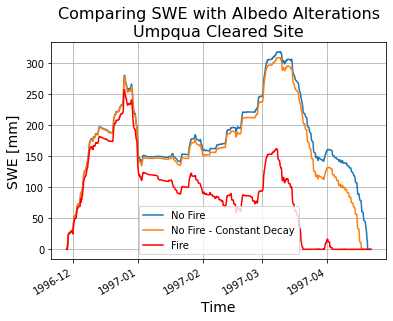

In [13]:
s.output['scalarSWE'].isel(hru=0).plot(label='No Fire')
s_cst.output['scalarSWE'].isel(hru=0).plot(label='No Fire - Constant Decay')
s_fire.output['scalarSWE'].isel(hru=0).plot(label='Fire', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('SWE [mm]')
plt.grid(True)
plt.title('Comparing SWE with Albedo Alterations\nUmpqua Cleared Site',size=16)
plt.savefig('umpqua_cleared.png',bbox_inches='tight',pad_inches=0.3)

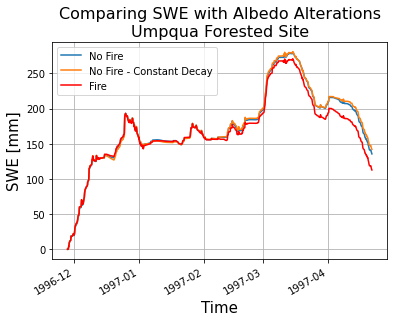

In [14]:
s.output['scalarSWE'].isel(hru=1).plot(label='No Fire')
s_cst.output['scalarSWE'].isel(hru=1).plot(label='No Fire - Constant Decay')
s_fire.output['scalarSWE'].isel(hru=1).plot(label='Fire', color='red')
plt.legend()
plt.xlabel('Time', size=15)
plt.ylabel('SWE [mm]', size=15)
plt.title('Comparing SWE with Albedo Alterations\nUmpqua Forested Site',size=16)
plt.grid(True)
plt.savefig('umpqua_forested.png',bbox_inches='tight',pad_inches=0.3)

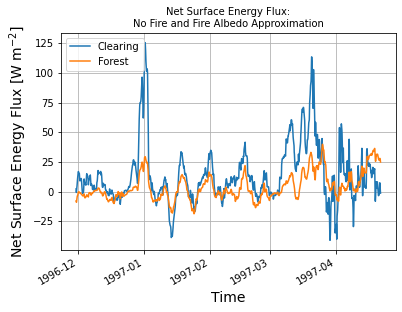

In [25]:
s_fire.output['scalarGroundNetNrgFlux'].isel(hru=0).rolling(time=24).mean().plot(label='Clearing')
s_fire.output['scalarGroundNetNrgFlux'].isel(hru=1).rolling(time=24).mean().plot(label='Forest')
plt.grid(True)
plt.legend()
plt.ylabel('Net Surface Energy Flux [W m$^{-2}$]')
plt.xlabel('Time')
plt.title('Net Surface Energy Flux:\nNo Fire and Fire Albedo Approximation')
plt.savefig('GroundEnergyFlux.png',bbox_inches='tight',pad_inches=0.3)


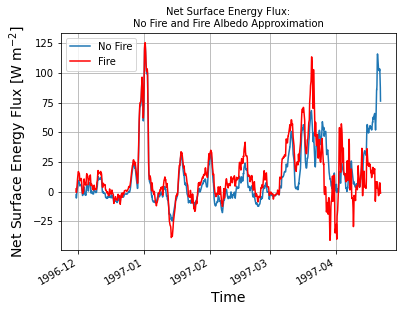

In [26]:
s.output['scalarGroundNetNrgFlux'].isel(hru=0).rolling(time=24).mean().plot(label='No Fire')
s_fire.output['scalarGroundNetNrgFlux'].isel(hru=0).rolling(time=24).mean().plot(label='Fire', color='r')
plt.grid(True)
plt.legend()
plt.ylabel('Net Surface Energy Flux [W m$^{-2}$]')
plt.xlabel('Time')
plt.title('Net Surface Energy Flux:\nNo Fire and Fire Albedo Approximation')
plt.savefig('GroundEnergyFlux_fire.png',bbox_inches='tight',pad_inches=0.3)

In [16]:
import pysumma.plotting as psp

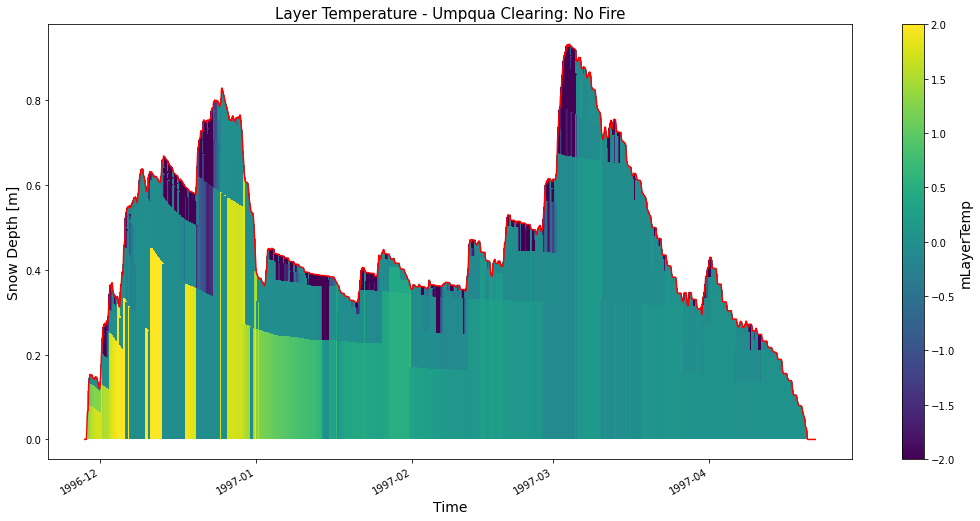

In [17]:
depth = s.output.isel(hru=0)['iLayerHeight']
temp = s.output.isel(hru=0)['mLayerTemp']-273.15
psp.layers(temp, 
           depth, 
           colormap='viridis', 
           plot_soil=False, 
           plot_snow=True,
           variable_range=[-2, 2],                         # Set a range for the colors
           line_kwargs={'linewidth': 2})  
s.output['scalarSnowDepth'].isel(hru=0).plot(color='red')

plt.title('Layer Temperature - Umpqua Clearing: No Fire', size=15)
plt.xlabel('Time')
plt.ylabel('Snow Depth [m]')
plt.savefig('layer-temp-no-fire')

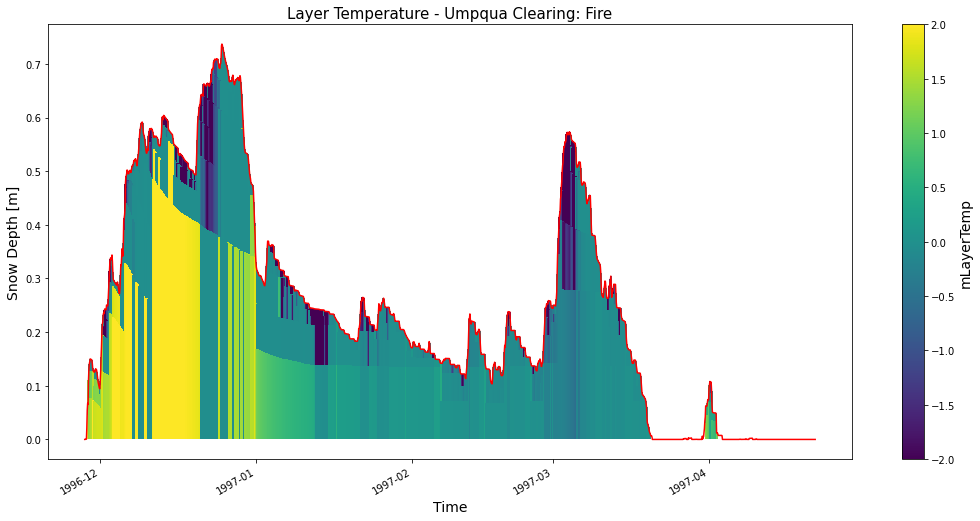

In [18]:
depth = s_fire.output.isel(hru=0)['iLayerHeight']
temp = s_fire.output.isel(hru=0)['mLayerTemp']-273.15
psp.layers(temp, 
           depth, 
           colormap='viridis', 
           plot_soil=False, 
           plot_snow=True,
           variable_range=[-2,2],                         # Set a range for the colors
           line_kwargs={'linewidth': 2})     
s_fire.output['scalarSnowDepth'].isel(hru=0).plot(color='red')
plt.title('Layer Temperature - Umpqua Clearing: Fire', size=15)
plt.xlabel('Time')
plt.ylabel('Snow Depth [m]')
plt.savefig('layer-temp-fire.png')

## On to the next step

Before you go on restore the original parameters as we did in the previous exercise.

That's it for the second part of the first homework as far as the model simulations go. Prof. Lundquist will talk more about the analysis that you need to do on these simulations. You can do the analysis here in this notebook if python is your analysis software of choice or you can upload your output to HydroShare (in NetCDF or csv format) to do additional analysis.

Save this notebook and close the tab. You can also right-click on the file in the left panel if it has a green dot next to it and select "_Shutdown kernel_" from the popup menu to stop the python session that is executing the commands in this notebook. Then open the next notebook: 
`/home/jovyan/data/cuahsi_vu/homework_2/homework_2_C_exercise_3.ipynb`.

## References

* Clark, M. P., B. Nijssen, J. Lundquist, D. Kavetski, D. Rupp, R. Woods, J. Freer, E. Gutmann, A. Wood, D. Gochis, R. Rasmussen, D. Tarboton, V. Mahat, G. Flerchinger, D. Marks, 2015: A unified approach for process-based hydrologic modeling: Part 2. Model implementation and case studies. _Water Resources Research_, [doi:10.1002/2015WR017200](http://doi.org/10.1002/2015WR017200).

Slide deck